# Clustering and PCA

This notebook summarize the clustering methods and dimension reduction using PCA performed before supervised learning and model selection. As part of Exploratory Data Analysis (EDA) and in extention of the analysis performed before with plots and metrics on variables the goal is to spot trends and paterns in the data.

In [2]:
import pandas as pd 
import sys
sys.path.append('../src')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from movies_preprocessing import full_processing
from sklearn.metrics import silhouette_score
import os

In [ ]:
df = pd.read_csv('../data/final_oscar_data.csv')
features = ["year_film", "genres", "averageRating", "dir_won_before", "budget", "nb_actor_won_before","won_bafta","won_gg_drama","won_gg_comedy", "runtimeMinutes"]
X = df[features]
X_processed = full_processing(X, "median")
X_processed = X_processed.drop(columns=['year_film'])
y = df['winner']

/Users/emile/Desktop/MLProject/Notebooks/../src/movies_preprocessing.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genres_list"] = df["genres"].str.split(",")


## Clustering 
In order to see if we can cluster the data, find a pattern, or identify a cluster with higher winners concentration, we need to determine the optimal number of clusters. To do so, we use a metric called **silhouette score**, computed as follows. For each point, the score is based on the average distance with the rest of its cluster,

$$
a(i) = \frac{1}{|I_k| - 1} \sum_{\substack{j \in I_k \\ j \ne i}} d(x^i, x^j)
$$

and the average distance with the closest different cluster,

$$
b(i) = \min_{k' \neq k} \frac{1}{|I_{k'}|} \sum_{i' \in I_{k'}} d(x^{i}, x^{i'})
$$

This gives us the silhouette score for point \(i\),

$$
s_{sil}(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

The silhouette score for the full dataset explains how well the data have been classified and ranges from \(-1\), worst classification, to \(1\), best classification:

$$
S_{sil} = \frac{1}{K} \sum_{k=1}^{K} \frac{1}{|I_k|} \sum_{i \in I_k} s_{sil}(i)
$$

 

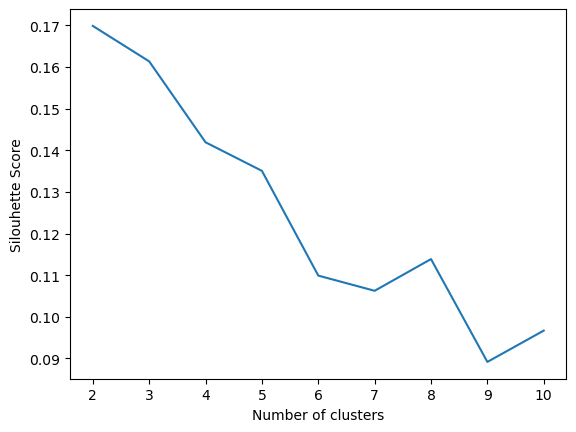

In [ ]:
sil_score_k = []
kmax = 10
ks = [k for k in range(2,kmax+1)]
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(X_processed)
    labels = kmeans.labels_
    sil_score_k.append(silhouette_score(X_processed, labels, metric = "euclidean"))

plt.plot(ks, sil_score_k)
plt.xlabel('Number of clusters')
plt.ylabel('Silouhette Score')
plt.show()
plt.close()

According to the plot above the optimal k is k=2. 

## PCA Projection

To visualize how the clusters are behaving and to see if it fits in any way our winners-nominees situation we use PCA with two components to plot the data. We obtain the two following plots.

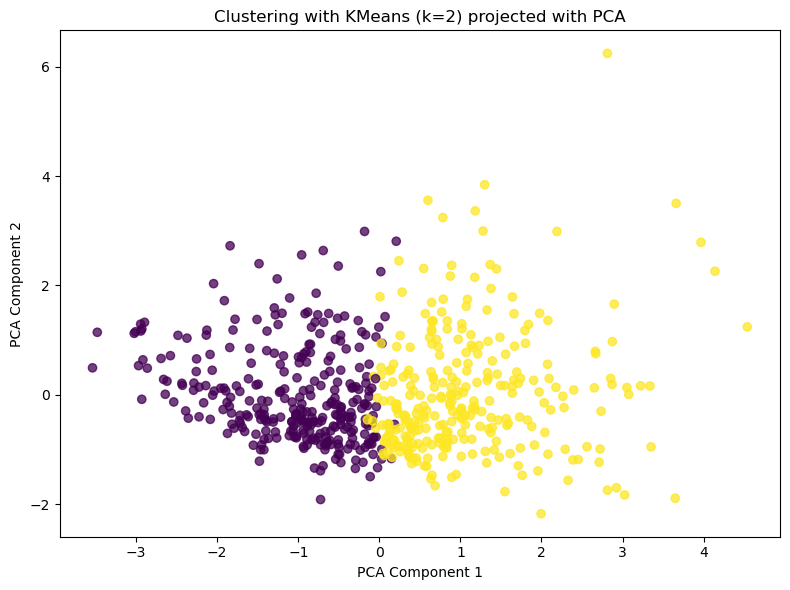

In [6]:
#PCA with 2 componenents

kmeans = KMeans(n_clusters=2).fit(X_processed)
cluster_labels = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.75)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clustering with KMeans (k=2) projected with PCA")
plt.tight_layout()
plt.show()
plt.close()

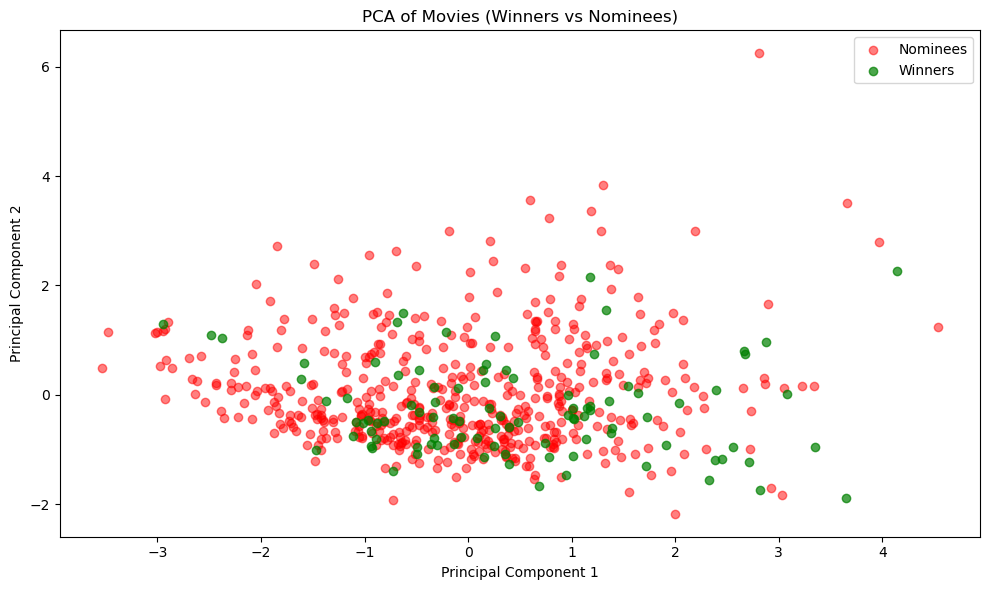

In [8]:
winners_mask = y == 1
nominees_mask = y == 0

# Plot
plt.figure(figsize=(10, 6))

plt.scatter(X_pca[nominees_mask, 0], X_pca[nominees_mask, 1], 
            c='red', label='Nominees', alpha=0.5)

plt.scatter(X_pca[winners_mask, 0], X_pca[winners_mask, 1], 
            c='green', label='Winners', alpha=0.7)

plt.title("PCA of Movies (Winners vs Nominees)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()
plt.close()

While the clustering algorithm seems to find a structure in the data, it does not correspond to the outcome we want to predict. This could be explained by several reasons:
- The transformation through PCA may not capture some non-linear relationships.
- K-means might not be the most suitable algorithm for this precise task.
- The features used may not be sufficient to discriminate the winners from the nominees.